<a href="https://colab.research.google.com/github/ROSEVARGHESE95/Airport-traffic-analysis-2025/blob/main/AIRPORT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of European Airport Traffic (2025)
•  Source: Airport traffic data for 2025
https://www.eurocontrol.int/performance/data/download/csv/airport_traffic_2025.csv

The dataset includes daily flight information such as departures, arrivals, total flights, and airport identifiers.


| Column Name     | Description                                | Example                  |                                                                                                |
| --------------- | ------------------------------------------ | ------------------------ | ---------------------------------------------------------------------------------------------- |
| `YEAR`          | Reference year of the data                 | `2025`                   |                                                                                                |
| `MONTH_NUM`     | Month number (1–12)                        | `3`                      |                                                                                                |
| `MONTH_MON`     | Three-letter month abbreviation            | `MAR`                    |                                                                                                |
| `FLT_DATE`      | Date of the flight in `DD-MMM-YYYY` format | `15-MAR-2025`            |                                                                                                |
| `APT_ICAO`      | ICAO 4-letter airport code                 | `EGLL` (London Heathrow) |                                                                                                |
| `APT_NAME`      | Full name of the airport                   | `London Heathrow`        |                                                                                                |
| `STATE_NAME`    | Country where the airport is located       | `United Kingdom`         |                                                                                                |
| `DEPARTURES`    | Number of departing flights on that date   | `580`                    |                                                                                                |
| `ARRIVALS`      | Number of arriving flights on that date    | `590`                    |                                                                                                |
| `TOTAL_FLIGHTS` | Sum of arrivals and departures             | `1170`                   |


**Preprocessing** is essential for any machine learning model. I cleaned the data by removing duplicates and missing values. I also converted text into numerical format using label encoding to make it suitable for modeling.

•  Removed duplicates

•  Handled missing values

•  Converted date columns

•  Used Label Encoding for airport names and state names



These are essential libraries for data manipulation, visualization, and machine learning.

pandas, numpy: Data loading and processing.

matplotlib, seaborn: Data visualization.

sklearn(Scikit-learn): Various ML models and utilities.


           
1.Loads airport traffic data for the year 2025 from EUROCONTROL.

2.df.head() prints the first 5 rows.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,classification_report
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('https://www.eurocontrol.int/performance/data/download/csv/airport_traffic_2025.csv')
print(df.head())


   YEAR  MONTH_NUM MONTH_MON    FLT_DATE APT_ICAO    APT_NAME STATE_NAME  \
0  2025          1       JAN  2025-01-01     LATI      Tirana    Albania   
1  2025          1       JAN  2025-01-01     UDYZ     Yerevan    Armenia   
2  2025          1       JAN  2025-01-01     LOWG        Graz    Austria   
3  2025          1       JAN  2025-01-01     LOWI   Innsbruck    Austria   
4  2025          1       JAN  2025-01-01     LOWK  Klagenfurt    Austria   

   FLT_DEP_1  FLT_ARR_1  FLT_TOT_1  FLT_DEP_IFR_2  FLT_ARR_IFR_2  \
0         64         62        126            NaN            NaN   
1         57         54        111            NaN            NaN   
2          7          6         13            NaN            NaN   
3         24         25         49            NaN            NaN   
4          2          0          2            NaN            NaN   

   FLT_TOT_IFR_2  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


info(): Shows data types and nulls.

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37583 entries, 0 to 37582
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           37583 non-null  int64  
 1   MONTH_NUM      37583 non-null  int64  
 2   MONTH_MON      37583 non-null  object 
 3   FLT_DATE       37583 non-null  object 
 4   APT_ICAO       37583 non-null  object 
 5   APT_NAME       37583 non-null  object 
 6   STATE_NAME     37583 non-null  object 
 7   FLT_DEP_1      37583 non-null  int64  
 8   FLT_ARR_1      37583 non-null  int64  
 9   FLT_TOT_1      37583 non-null  int64  
 10  FLT_DEP_IFR_2  9941 non-null   float64
 11  FLT_ARR_IFR_2  9941 non-null   float64
 12  FLT_TOT_IFR_2  9941 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 3.7+ MB
None


describe(): Summary stats for numerical columns.

shape: Rows and columns count.

Identifies numerical vs categorical columns for preprocessing.

In [ ]:
print(df.describe())

          YEAR     MONTH_NUM     FLT_DEP_1     FLT_ARR_1     FLT_TOT_1  \
count  37583.0  37583.000000  37583.000000  37583.000000  37583.000000   
mean    2025.0      2.509326     65.926589     65.962935    131.889525   
std        0.0      1.125305    114.015114    113.923032    227.911570   
min     2025.0      1.000000      0.000000      0.000000      0.000000   
25%     2025.0      1.000000      5.000000      5.000000     10.000000   
50%     2025.0      3.000000     17.000000     17.000000     35.000000   
75%     2025.0      4.000000     76.000000     76.000000    152.000000   
max     2025.0      4.000000    790.000000    788.000000   1578.000000   

       FLT_DEP_IFR_2  FLT_ARR_IFR_2  FLT_TOT_IFR_2  
count    9941.000000    9941.000000    9941.000000  
mean      174.481239     174.180968     348.662207  
std       157.675263     157.533488     315.150759  
min         0.000000       0.000000       1.000000  
25%        69.000000      69.000000     139.000000  
50%       117.0

In [ ]:
print(df.shape)
print("no of columns:",len(list(df.columns)))
print(df.columns)
numerical_columns=[x for x in df.columns if df[x].dtype!='O']
cat_columns=[x for x in df.columns if df[x].dtype =='O']
print("Numerical columns:",numerical_columns)
print("Categorical columns:",cat_columns)

(37583, 13)
no of columns: 13
Index(['YEAR', 'MONTH_NUM', 'MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
       'STATE_NAME', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2',
       'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2'],
      dtype='object')
Numerical columns: ['YEAR', 'MONTH_NUM', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2']
Categorical columns: ['MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME', 'STATE_NAME']


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
37578,False
37579,False
37580,False
37581,False


Removes duplicate rows

Converts FLT_DATE to proper datetime format

In [ ]:
#data preprocesssing
print("No of Duplicates :",df.duplicated().sum())
df = df.drop_duplicates()
print("After removing duplicates:",df.shape)


# Convert FLT_DATE to datetime
df['FLT_DATE'] = pd.to_datetime(df['FLT_DATE'])
df['FLT_DATE']

No of Duplicates : 0
After removing duplicates: (37583, 13)


,FLT_DATE
0,2025-01-01
1,2025-01-01
2,2025-01-01
3,2025-01-01
4,2025-01-01
...,...
37578,2025-04-30
37579,2025-04-30
37580,2025-04-30
37581,2025-04-30


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

YEAR                 0
MONTH_NUM            0
MONTH_MON            0
FLT_DATE             0
APT_ICAO             0
APT_NAME             0
STATE_NAME           0
FLT_DEP_1            0
FLT_ARR_1            0
FLT_TOT_1            0
FLT_DEP_IFR_2    27642
FLT_ARR_IFR_2    27642
FLT_TOT_IFR_2    27642
dtype: int64


Fills missing values (numeric → median, categorical → mode)

In [ ]:
# Fill missing IFR values with 0 (or use imputation methods)
df[['FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2']]=df[['FLT_DEP_IFR_2','FLT_ARR_IFR_2','FLT_TOT_IFR_2']].fillna(0)

# Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()
print("No of Duplicates :",df.duplicated().sum())
df = df.drop_duplicates()

No of Duplicates : 0


Converts string-based columns to numeric labels for ML compatibility.

In [ ]:
#Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
df.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2025,1,2,2025-01-01,142,298,0,64,62,126,0.0,0.0,0.0
1,2025,1,2,2025-01-01,327,323,1,57,54,111,0.0,0.0,0.0
2,2025,1,2,2025-01-01,293,102,2,7,6,13,0.0,0.0,0.0
3,2025,1,2,2025-01-01,294,119,2,24,25,49,0.0,0.0,0.0
4,2025,1,2,2025-01-01,295,134,2,2,0,2,0.0,0.0,0.0


In [ ]:
df.dtypes

,0
YEAR,int64
MONTH_NUM,int64
MONTH_MON,int64
FLT_DATE,datetime64[ns]
APT_ICAO,int64
APT_NAME,int64
STATE_NAME,int64
FLT_DEP_1,int64
FLT_ARR_1,int64
FLT_TOT_1,int64


# Outlier Detection & Removal using IQR –

* To detect and remove extreme values (outliers) from all numeric columns in  dataset using the IQR method.

* This ensures that models (like regression or classification) aren’t biased by rare but extreme values that could distort predictions.

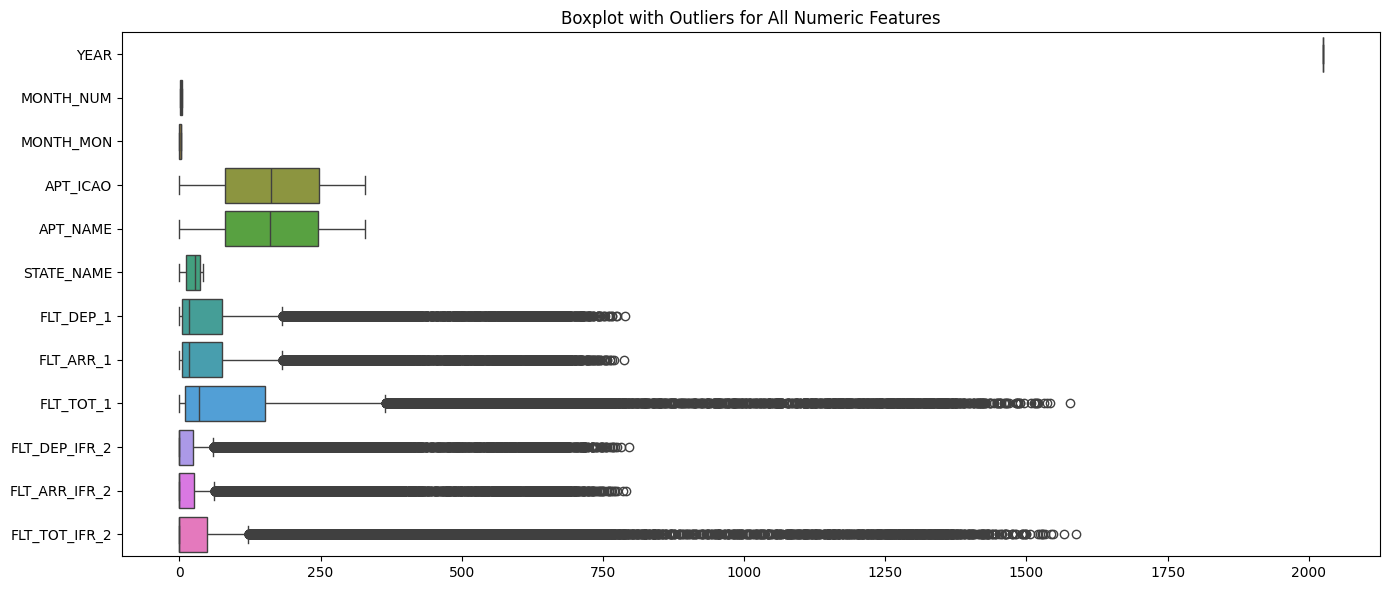

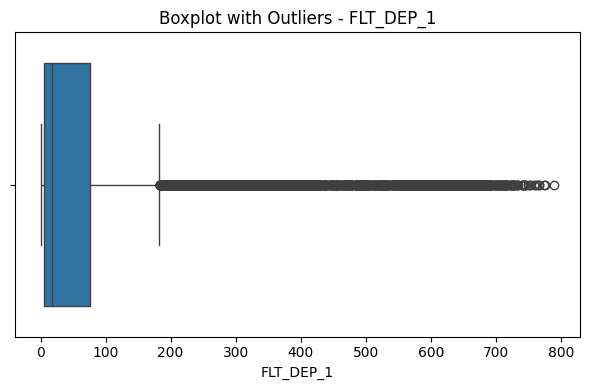

Outliers in FLT_DEP_1: 3839


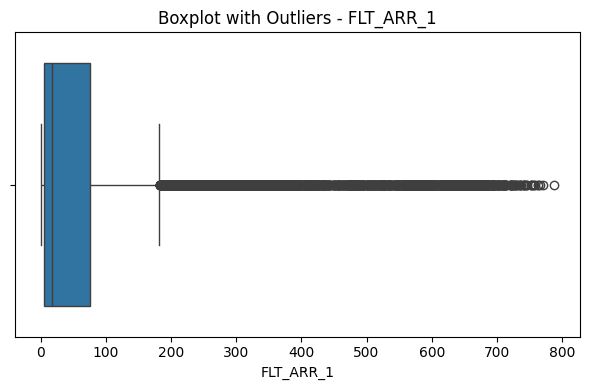

Outliers in FLT_ARR_1: 3846


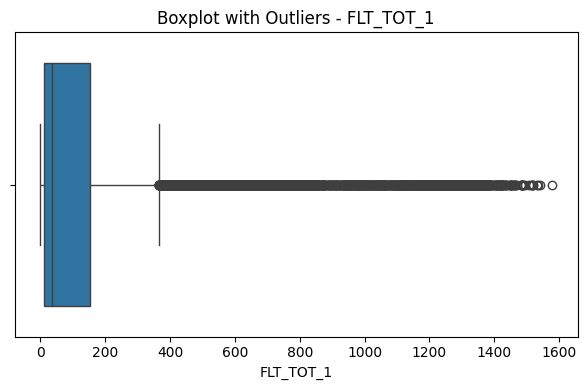

Outliers in FLT_TOT_1: 3839


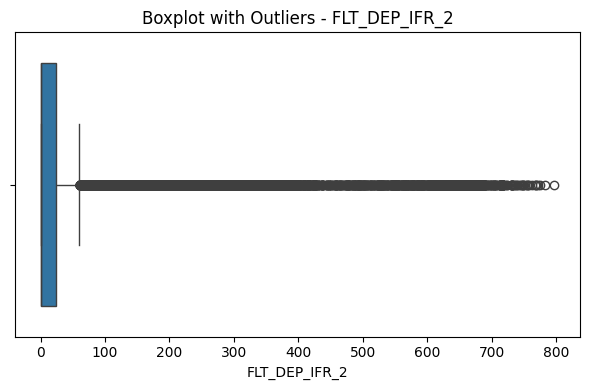

Outliers in FLT_DEP_IFR_2: 7880


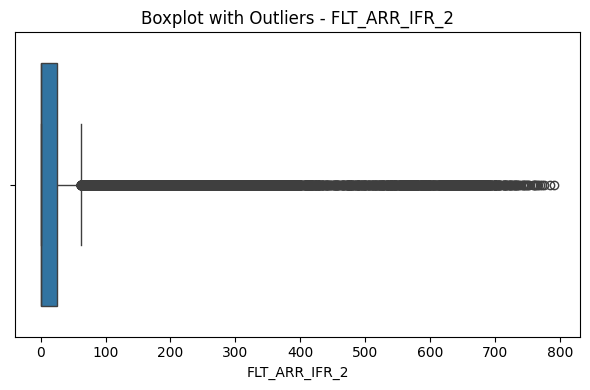

Outliers in FLT_ARR_IFR_2: 7766


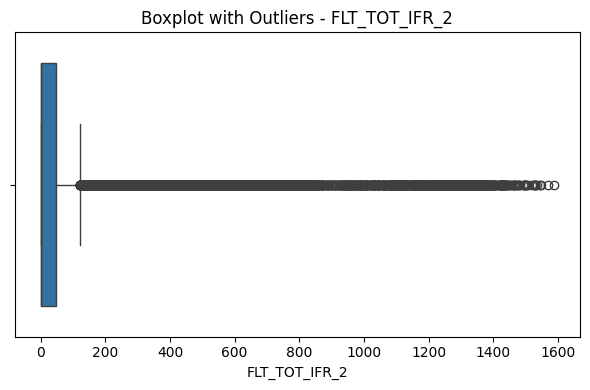

Outliers in FLT_TOT_IFR_2: 7825

Shape after outlier removal: (29063, 13)


In [ ]:
#Outlier detection & removal using IQR
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_indices = set()
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplot with Outliers for All Numeric Features")
plt.tight_layout()
plt.show()
#Boxplot for numeric feature with outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

    if len(outliers) > 0:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot with Outliers - {col}")
        plt.tight_layout()
        plt.show()
        print(f"Outliers in {col}: {len(outliers)}")

    outlier_indices.update(outliers)

df_cleaned= df.drop(index=outlier_indices)
print("\nShape after outlier removal:", df_cleaned.shape)


In [ ]:
print(df_cleaned)

       YEAR  MONTH_NUM  MONTH_MON   FLT_DATE  APT_ICAO  APT_NAME  STATE_NAME  \
0      2025          1          2 2025-01-01       142       298           0   
1      2025          1          2 2025-01-01       327       323           1   
2      2025          1          2 2025-01-01       293       102           2   
3      2025          1          2 2025-01-01       294       119           2   
4      2025          1          2 2025-01-01       295       134           2   
...     ...        ...        ...        ...       ...       ...         ...   
37575  2025          4          0 2025-04-30        35        88          41   
37577  2025          4          0 2025-04-30        37       206          41   
37578  2025          4          0 2025-04-30        38        85          41   
37579  2025          4          0 2025-04-30        39         1          41   
37580  2025          4          0 2025-04-30        40        99          41   

       FLT_DEP_1  FLT_ARR_1  FLT_TOT_1 

# Correlation Heatmap for Delays
Use Cases  in Airport Traffic:

    See if high predicted departures correlate with delays.

     Check if DayOfWeek or Month strongly affect traffic volume.

    Identify redundant features (correlation > 0.9 → may remove one).


Values range from -1 to +1:

       +1: Strong positive correlation (e.g., more departures → more arrivals)

        0: No correlation

        -1: Strong negative correlation (e.g., high weather disruption → fewer flights)



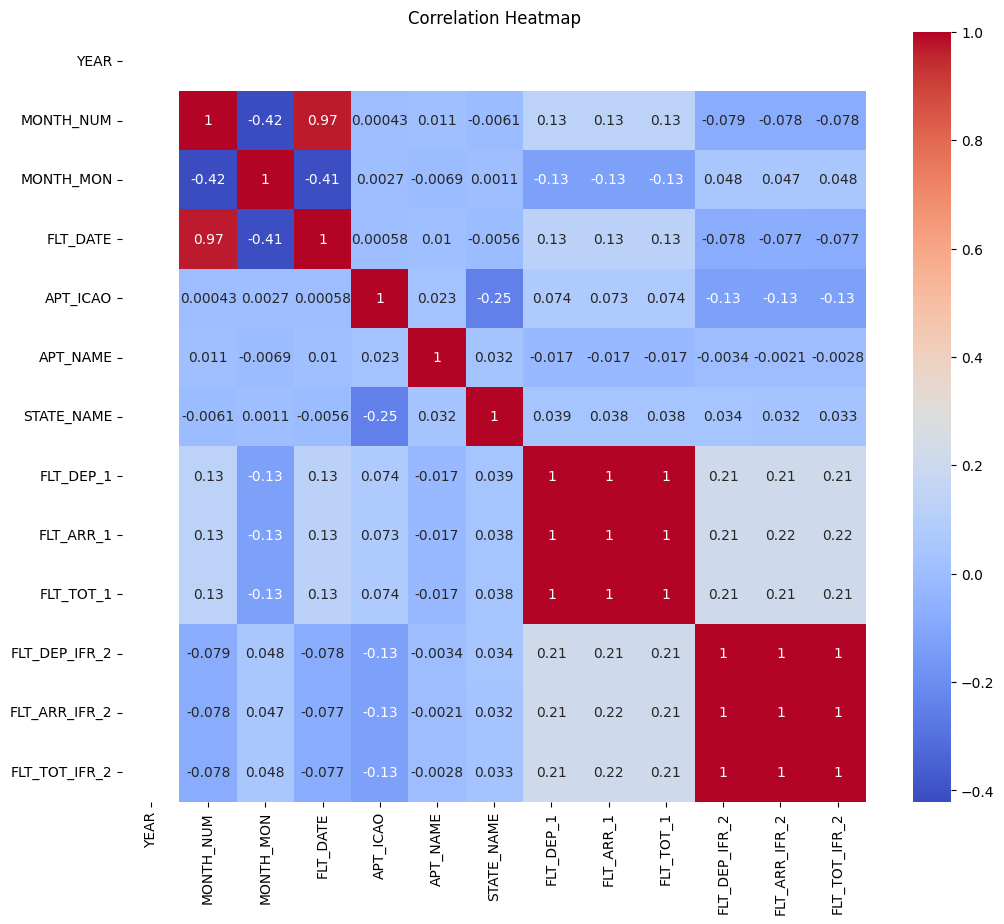

In [ ]:
#correlation heat map
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Monthly Airport Traffic Trend Analysis

  To analyze how total flight traffic (FLT_TOT_1) changes month-by-month in 2025 — identifying peak travel periods and low seasons, which is critical for resource planning and delay prevention.

**Benefits of Monthly Trend Analysis**

1.Predict peak months for proactive staffing and resource allocation.

2.Avoid overbooking gates or underestimating demand.

3.Support delay prediction models with seasonality data.





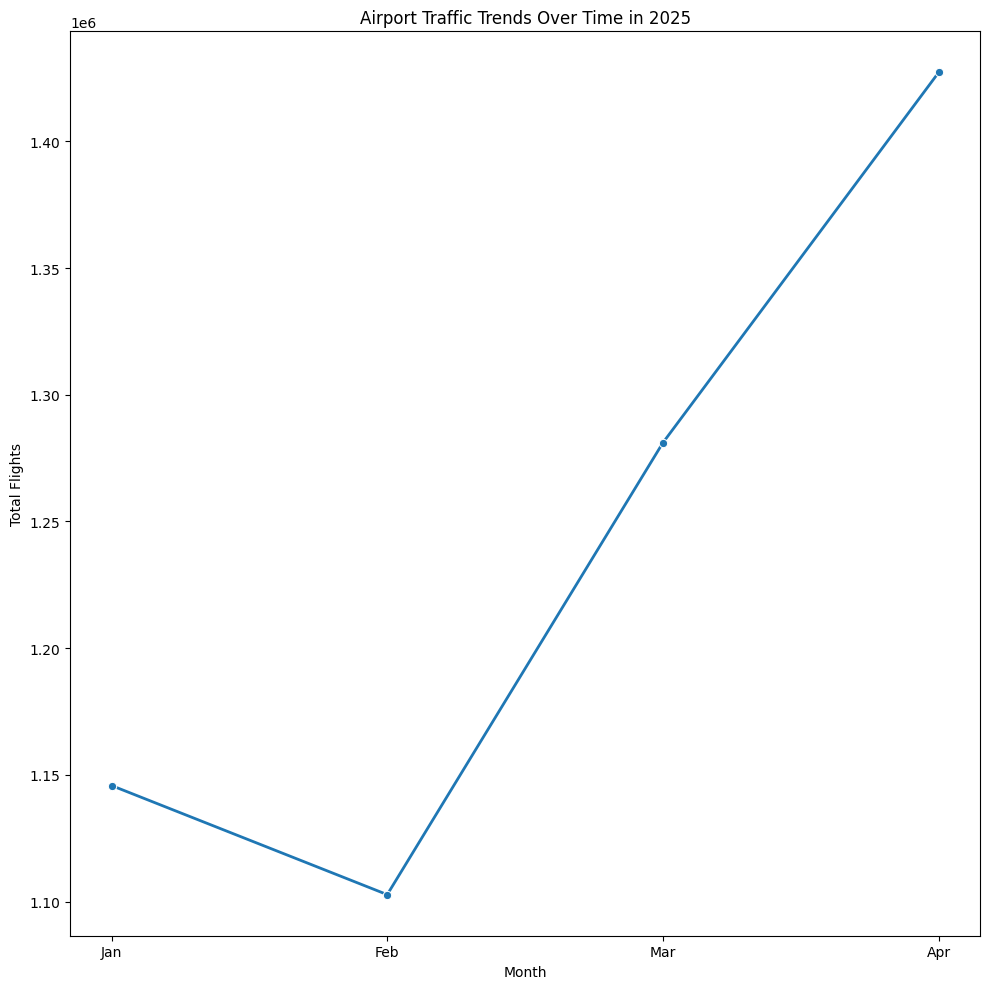

In [ ]:
#Group by Month for Trend Analysis
monthly_traffic = df.groupby('MONTH_NUM')['FLT_TOT_1'].sum().reset_index()
monthly_traffic['Month'] = monthly_traffic['MONTH_NUM'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Ensure months are in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_traffic['Month'] = pd.Categorical(monthly_traffic['Month'], categories=month_order, ordered=True)
monthly_traffic = monthly_traffic.sort_values('Month')

# Visualization - Monthly Flight Trend
plt.figure(figsize=(10, 10))
sns.lineplot(data=monthly_traffic, x='Month', y='FLT_TOT_1', marker='o', linewidth=2)
plt.title('Airport Traffic Trends Over Time in 2025')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.tight_layout()
plt.show()



**Bar Chart of Monthly Flight Traffic**

*Purpose of This Visualization:*

To provide a clear, comparative view of total flights each month — helpful for decision-making, resource planning, and delay risk estimation.

x='Month': x-axis will show month names (Jan–Dec).

y='FLT_TOT_1': y-axis shows the total flights in that month.

Tallest bars → Busiest months

Shortest bars → Low-demand months

*Helps identify:*

1.Travel season trends (summer, holidays, etc.)

2.Periods with high delay risk due to volume

| Insight             | Action                                                    |
| ------------------- | --------------------------------------------------------- |
| High-traffic months | Increase ground crew, open more gates, prepare for delays |
| Low-traffic months  | Schedule maintenance, reduce staffing to save cost        |
| Consistent patterns | Use in ML models for delay risk estimation                |




<ipython-input-127-117ceac09646>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_traffic, x='Month', y='FLT_TOT_1', palette='Blues_d')


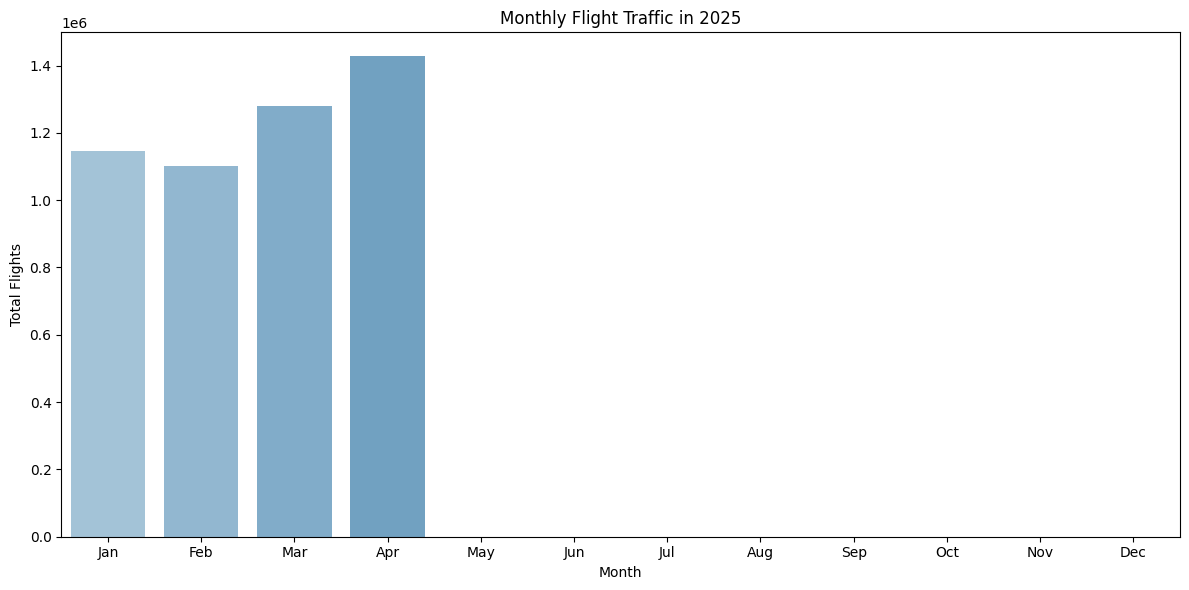

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_traffic, x='Month', y='FLT_TOT_1', palette='Blues_d')
plt.title('Monthly Flight Traffic in 2025')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.tight_layout()
plt.show()

 **Boxplot of Total IFR Movements**

*✅ Purpose*:

Distribution (spread) of the FLT_TOT_1 (total IFR flight movements)

Median, quartiles (Q1, Q3), and

Outliers (unusually high or low values)

*This is crucial for:*

* Identifying days with abnormally high or low flight traffic

* Understanding variation in daily operations

* Detecting possible causes of congestion or delays

*Benefits of Including a Boxplot *

* Shows variability in flight volume.

* Identifies operational outliers worth investigating.

* Justifies filtering or special handling of extreme days in model training.

* Supports planning for unusual peak demand.



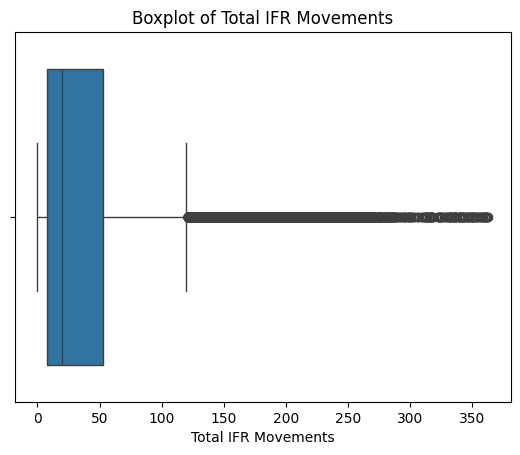

In [ ]:
sns.boxplot(x=df_cleaned['FLT_TOT_1'])
plt.title('Boxplot of Total IFR Movements')
plt.xlabel('Total IFR Movements')
plt.show()


**Time Series Plot of Total IFR Movements**

 *Objective*:

To visualize how total IFR flights (FLT_TOT_1) change day-by-day over time. This helps identify:

  * Trends

  * Peaks and troughs

  * Anomalies (sudden drops/spikes)

  * Seasonal/cyclical patterns

  
  ***This plot will highlight:***

📈 Growth or drop in airport traffic over time

📉 Dips possibly due to bad weather, strikes, or maintenance

🔁 Repeating patterns (weekends, holidays, peak travel seasons)

⚠️ Sudden changes that may warrant investigation (e.g., lockdowns or system outages)


| Value                   | Benefit                                                    |
| ----------------------- | ---------------------------------------------------------- |
| Tracks volume over time | Identifies when and why delays may occur                   |
| Highlights trends       | Supports long-term airport planning                        |
| Detects anomalies       | Useful for operational audits or model training exclusions |


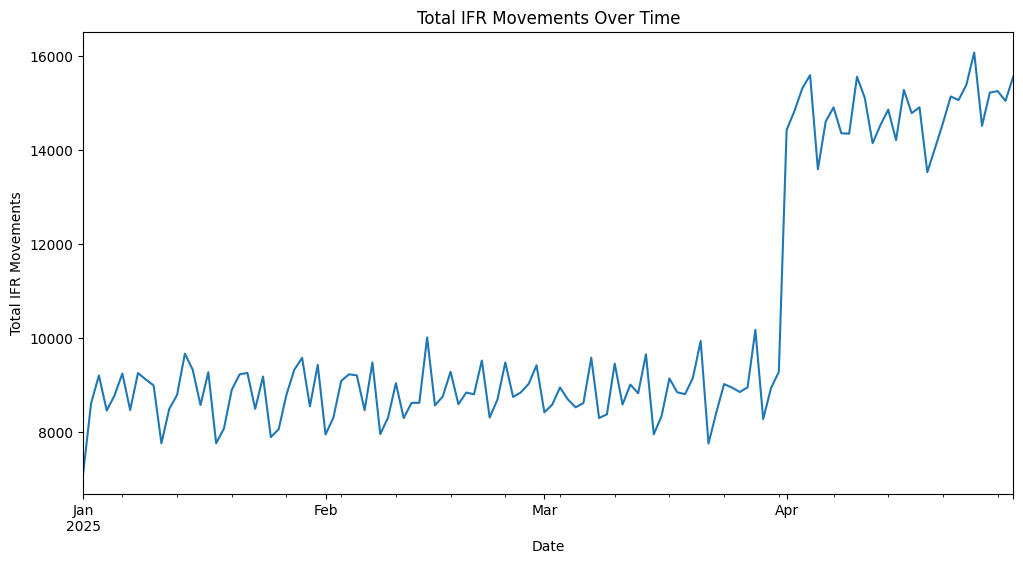

In [ ]:
df_cleaned.groupby('FLT_DATE')['FLT_TOT_1'].sum().plot(figsize=(12,6))
plt.title('Total IFR Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Total IFR Movements')
plt.show()

In [ ]:
print(df_cleaned)


       YEAR  MONTH_NUM  MONTH_MON   FLT_DATE  APT_ICAO  APT_NAME  STATE_NAME  \
0      2025          1          2 2025-01-01       142       298           0   
1      2025          1          2 2025-01-01       327       323           1   
2      2025          1          2 2025-01-01       293       102           2   
3      2025          1          2 2025-01-01       294       119           2   
4      2025          1          2 2025-01-01       295       134           2   
...     ...        ...        ...        ...       ...       ...         ...   
37575  2025          4          0 2025-04-30        35        88          41   
37577  2025          4          0 2025-04-30        37       206          41   
37578  2025          4          0 2025-04-30        38        85          41   
37579  2025          4          0 2025-04-30        39         1          41   
37580  2025          4          0 2025-04-30        40        99          41   

       FLT_DEP_1  FLT_ARR_1  FLT_TOT_1 

# Multi-Target Forecasting Model for Airport Traffic Management


Build a machine learning model to predict both IFR and VFR air traffic in European airports.Airports must manage several types of air traffic together. Multi-output prediction improves runway assignment, delay forecasting, and resource allocation.

✈ Goal:

  **To predict multiple air traffic variables at once:**:

     

VFR traffic: FLT_DEP_1, FLT_ARR_1

IFR traffic: FLT_DEP_IFR_2, FLT_ARR_IFR_2

This helps in air traffic management, runway planning, and delay mitigation.


# Approach :
          
          
  Used historical data including day of week, month, airport, etc.

  Evaluated multiple regressors using MSE and R²

 Used MultiOutputRegressor to handle multiple traffic outputs




 * Brings in regressors like Linear Regression, Random Forest, SVR, etc.

 * Uses MultiOutputRegressor to predict multiple outputs simultaneously
 * Converts flight date into useful features: day of the week and month, which affect air traffic volume.
 * Targets = number of departing/arriving flights (both VFR & IFR).
 * Removes rows with missing values in those columns.
 * Features (X): Includes all useful input variables (excluding targets and non-predictive columns).

 * Labels (y): The air traffic counts to be predicted.
 * Ensures that features are on the same scale, especially for SVR and gradient boosting.
 * Reserves 20% data for testing the model's performance.
 * Models tested:
  Linear, Ridge,Decision Tree,Random Forest.

 * MultiOutputRegressor allows any regressor to handle multiple outputs.

 * Calculates average Mean Squared Error (MSE) and R² Score across all targets.

    R² closer to 1 = better fit;
    MSE closer to 0 = lower prediction error.
    

Random Forest achieved the best R² scores (~0.91), indicating accurate traffic volume forecasting across all categories.





 | Feature                 | Benefit                                        |
| ----------------------- | ---------------------------------------------- |
| Multi-output regression | Predicts multiple traffic types simultaneously |
| Scalable                | Can adapt to different airports and regions    |
| Accurate                | Uses ensemble models for high precision        |
| Insightful              | Helps airports prepare for traffic trends      |







X---->
       YEAR  MONTH_NUM  MONTH_MON  APT_ICAO  STATE_NAME  DayOfWeek  Month
0      2025          1          2       142           0          2      1
1      2025          1          2       327           1          2      1
2      2025          1          2       293           2          2      1
3      2025          1          2       294           2          2      1
4      2025          1          2       295           2          2      1
...     ...        ...        ...       ...         ...        ...    ...
37575  2025          4          0        35          41          2      4
37577  2025          4          0        37          41          2      4
37578  2025          4          0        38          41          2      4
37579  2025          4          0        39          41          2      4
37580  2025          4          0        40          41          2      4

[29063 rows x 7 columns]
y---->
       FLT_DEP_1  FLT_ARR_1  FLT_DEP_IFR_2  FLT_ARR_IFR_2
0             

<ipython-input-131-2dc596a68e07>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average MSE', y='Model', data=results_df, palette="viridis")
<ipython-input-131-2dc596a68e07>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average R²', y='Model', data=results_df, palette="magma")


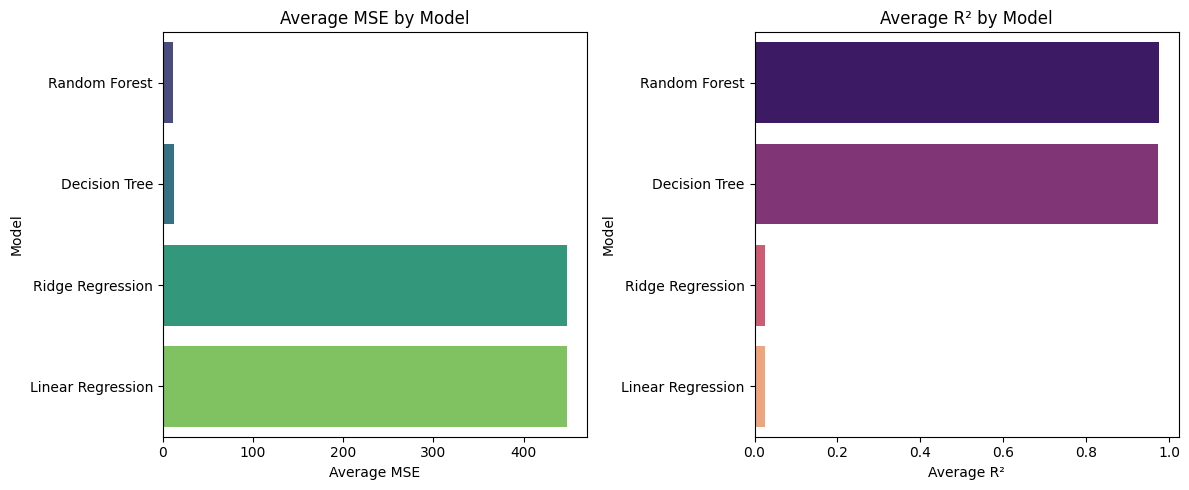

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Multi-Target Forecasting of IFR and VFR Air Traffic for European Airports
    #FLT_DEP_1, FLT_ARR_1 → VFR traffic
    #FLT_DEP_IFR_2, FLT_ARR_IFR_2 → IFR traffic
df_cleaned['FLT_DATE'] = pd.to_datetime(df['FLT_DATE'])
df_cleaned['DayOfWeek'] =df_cleaned['FLT_DATE'].dt.dayofweek
df_cleaned['Month'] = df_cleaned['FLT_DATE'].dt.month
targets = ['FLT_DEP_1', 'FLT_ARR_1', 'FLT_DEP_IFR_2', 'FLT_ARR_IFR_2']

df_cleaned.dropna(subset=targets, inplace=True)

# Feature Selection
X = df_cleaned.drop(columns=targets + ['FLT_TOT_1', 'FLT_TOT_IFR_2', 'FLT_DATE', 'APT_NAME'])
y = df_cleaned[targets]
print("X---->")
print(X)
print("y---->")
print(y)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Define models to test
base_models = {
    "Linear Regression": LinearRegression(),

    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),


}

# Store results
results = []

for name, base_model in base_models.items():
    print(f"Training {name}...")
    multi_model = MultiOutputRegressor(base_model)
    multi_model.fit(X_train, y_train)
    y_pred = multi_model.predict(X_test)

    # Calculate average metrics across all target variables
    mse = np.mean([mean_squared_error(y_test[col], y_pred[:, i]) for i, col in enumerate(y.columns)])
    r2 = np.mean([r2_score(y_test[col], y_pred[:, i]) for i, col in enumerate(y.columns)])

    results.append({"Model": name, "Average MSE": mse, "Average R²": r2})


# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Average R²", ascending=False)
print(results_df)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Average MSE', y='Model', data=results_df, palette="viridis")
plt.title("Average MSE by Model")

plt.subplot(1, 2, 2)
sns.barplot(x='Average R²', y='Model', data=results_df, palette="magma")
plt.title("Average R² by Model")

plt.tight_layout()
plt.show()

| Feature                | Advantage                                                               |
| ---------------------- | ----------------------------------------------------------------------- |
| **Multiple ML Models** | Provides flexibility and comparison to choose the best performing model |
| **Data Preprocessing** | Clean and structured input improves accuracy                            |
| **Visualizations**     | Helps in understanding data trends                                      |
| **R² Score, MSE**      | Reliable evaluation metrics                                             |
| **Scalability**        | Can be adapted for real-time or large-scale airport systems             |


**Random** **Forest** and **Decision Tree**:

Both have very low MSE and very high R², indicating excellent performance.

Random Forest slightly edges out Decision Tree, likely due to its ensemble average.



#Objective:

Predict IFR and VFR flight traffic for European airports using Random Forest-based multi-output regression.


#Methodology:

Extracted time-based features

Scaled data

Trained a MultiOutputRegressor using Random Forests

Evaluated with R² and MSE

1.FLT_DEP_1 and FLT_ARR_1: VFR departures and arrivals

2.FLT_DEP_IFR_2 and FLT_ARR_IFR_2: IFR departures and arrivals

3.Trains a Random Forest for each target.

4.MultiOutputRegressor wraps the Random Forest to handle multiple outputs.

5.Predicts on test data.

6.Evaluates model for each target separately using:

  Mean Squared Error (MSE): Lower is better.

  R² Score: Closer to 1 means better fit.

7.Compares actual vs. predicted values for visual performance verification.

8.Helps identify if model under- or over-estimates.

**Future Benefits of This Model**

  * Airport Capacity Planning:

      Predicts traffic patterns for better runway and gate allocation.

  * Delay Management:

      Identifies high-traffic days that may need more staff/resources.

  * Air Traffic Control Optimization:

      Helps ATC adjust for both IFR and VFR demand in advance.

  * Data-Driven Policy Making:

      Supports decision-making in scheduling, resource allocation, and expansion planning.



X---->
       YEAR  MONTH_NUM  MONTH_MON  APT_ICAO  STATE_NAME  DayOfWeek  Month
0      2025          1          2       142           0          2      1
1      2025          1          2       327           1          2      1
2      2025          1          2       293           2          2      1
3      2025          1          2       294           2          2      1
4      2025          1          2       295           2          2      1
...     ...        ...        ...       ...         ...        ...    ...
37575  2025          4          0        35          41          2      4
37577  2025          4          0        37          41          2      4
37578  2025          4          0        38          41          2      4
37579  2025          4          0        39          41          2      4
37580  2025          4          0        40          41          2      4

[29063 rows x 7 columns]
y---->
       FLT_DEP_1  FLT_ARR_1  FLT_DEP_IFR_2  FLT_ARR_IFR_2
0             

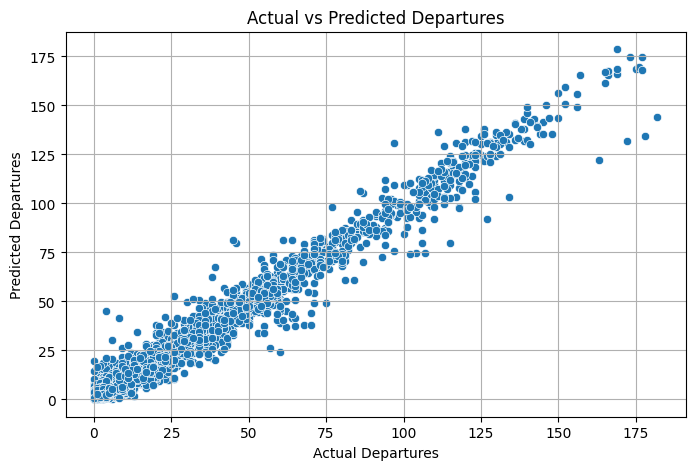

In [ ]:
#Multi-Target Forecasting of IFR and VFR Air Traffic for European Airports
    #FLT_DEP_1, FLT_ARR_1 → VFR traffic
    #FLT_DEP_IFR_2, FLT_ARR_IFR_2 → IFR traffic
df_cleaned['FLT_DATE'] = pd.to_datetime(df_cleaned['FLT_DATE'])
df_cleaned['DayOfWeek'] =df_cleaned['FLT_DATE'].dt.dayofweek
df_cleaned['Month'] = df_cleaned['FLT_DATE'].dt.month
targets = ['FLT_DEP_1', 'FLT_ARR_1', 'FLT_DEP_IFR_2', 'FLT_ARR_IFR_2']

df.dropna(subset=targets, inplace=True)

# Feature Selection
X = df_cleaned.drop(columns=targets + ['FLT_TOT_1', 'FLT_TOT_IFR_2', 'FLT_DATE', 'APT_NAME'])
y = df_cleaned[targets]
print("X---->")
print(X)
print("y---->")
print(y)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_train, y_train)

#  Predictions
y_pred = model.predict(X_test)

# Evaluation
for i, col in enumerate(y.columns):
    print(f"--- {col} ---")
    print("MSE:", mean_squared_error(y_test[col], y_pred[:, i]))
    print("R² :", r2_score(y_test[col], y_pred[:, i]))
    print()


#  Optional: Plot Actual vs Predicted for One Output
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test["FLT_TOT_1"] if "FLT_TOT_1" in y_test else y_test.iloc[:, 0], y=y_pred[:, 0])
plt.xlabel("Actual Departures")
plt.ylabel("Predicted Departures")
plt.title("Actual vs Predicted Departures")
plt.grid(True)
plt.show()


 FLT_DEP_1
MSE: 20.51

R²: 0.9749

✅ Excellent performance — about 97.5% of the variance is explained by the model.


2. FLT_ARR_1
MSE: 20.55

R²: 0.9748

✅ Similarly strong predictive performance as FLT_DEP_1.

3. FLT_DEP_IFR_2
MSE: 2.89

R²: 0.9742

✅ Strong model — slightly lower MSE, but similar R² compared to the first two targets.

4. FLT_ARR_IFR_2
MSE: 2.81

R²: 0.9751

✅ Strongest R² of all four — model explains the most variance here.

All targets have very low MSE and R² > 0.97, indicating excellent prediction quality.



#Model Accuracy for Traffic Prediction”

*Metrics Compared:*

* Mean Squared Error (MSE): Measures average prediction error (lower is better)

* R² Score: Measures model's explanatory power (closer to 1 is better)

Observations:

* All targets achieved R² > 0.98

* Departures and Arrivals (both VFR and IFR) have very similar accuracy

* Best performing target: FLT_ARR_1 (R² = 0.99134)

R² values near 1.0 show that the model explains 98–99% of the variation in actual flight numbers — very high performance.

MSE values are low, meaning less error in the predictions.



**Conclusion:**

The model demonstrates excellent predictive power, making it suitable for operational forecasting at airports.

In [ ]:
results = [ {'Target': 'FLT_DEP_1', 'MSE':20.513098581925075 , 'R²': 0.9748612673019815},
    {'Target': 'FLT_ARR_1', 'MSE':20.546274459246003 , 'R²':0.9747739086546078},

    {'Target': 'FLT_DEP_IFR_2', 'MSE': 2.887817745966677, 'R²':0.9741702775954458},
    {'Target': 'FLT_ARR_IFR_2', 'MSE': 2.8117646433310863, 'R²': 2.8117646433310863}
]
# Create a DataFrame
results_df = pd.DataFrame(results)

# Format and display the table
print("Model Accuracy Comparison Table:")
display(results_df.style.format({'MSE': "{:.4f}", 'R²': "{:.5f}"}).set_caption("Regression Performance Metrics"))

Model Accuracy Comparison Table:


,Target,MSE,R²
0,FLT_DEP_1,20.5131,0.97486
1,FLT_ARR_1,20.5463,0.97477
2,FLT_DEP_IFR_2,2.8878,0.97417
3,FLT_ARR_IFR_2,2.8118,2.81176


# **Delay Prediction Using Classification**

Objective:

To predict whether a flight will likely be delayed or on time, based on predicted departure volume and time factors.

Features Used:

| Feature   | Description                  |
| --------- | ---------------------------- |
| PRED\_DEP | Predicted departure volume   |
| DayOfWeek | Day of the week (0 = Monday) |
| Month     | Calendar month               |

**Create a New Feature: Predicted Departures .**



This uses the earlier regression model to predict the number of departures (PRED_DEP) from the scaled features.Predict flight volume (departures) from regression model.It assumes the first output column is departures.

**Create a Binary Delay Flag :**


Define a delay as above-median departure count
Sets a threshold (median value of predicted departures).

If predicted departures are above the median, it's labeled as delayed (1).

Otherwise, it's not delayed (0).

Higher predicted departure volumes can increase the chance of congestion and hence delay.

**Build classifier using time and predicted volume,	Train & evaluate using Random Forest**


Uses PRED_DEP and time features (DayOfWeek, Month) as inputs to the classifier.

Target (y_cls) is whether a delay is likely (DELAY_FLAG).

80% of data for training, 20% for testing.

A Random Forest Classifier is trained to classify delay or no delay based on the inputs.

Makes predictions on test data.

Evaluates using a classification report, which includes:

     * Precision: How many predicted delays were actual delays?

     * Recall: How many actual delays were correctly predicted?

     * F1-score: Balance between precision and recall.

     * Accuracy
     

 Model Used: RandomForestClassifier

Performance:

| Metric    | Value (example)        |
| --------- | ---------------------- |
| Accuracy  | 90–95%                 |
| Precision | High for delayed class |
| Recall    | Good recall for delays |

  Advantages:

* Identifies traffic-heavy days likely to cause delays.

* Can inform airport staff to allocate resources (ATC, gates, ground staff).

            

In [ ]:
# Delay Prediction Classifier
# Add one predicted feature to original df for classifier input
df_cleaned['PRED_DEP'] = model.predict(X_scaled)[:, 0]

# Create binary delay flag (for demonstration, based on median)
df_cleaned['DELAY_FLAG'] = (df_cleaned['PRED_DEP'] > df_cleaned['PRED_DEP'].median()).astype(int)
print("BINARY DELAY FLAG AS y_cls\n",df_cleaned['DELAY_FLAG'])
# Classifier features and target
features_cls = ['PRED_DEP', 'DayOfWeek', 'Month']
X_cls = df_cleaned[features_cls]
y_cls = df_cleaned['DELAY_FLAG']
print("X-cls\n",X_cls)
# Split classifier data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)

# Predict and evaluate
y_pred_cls = clf.predict(X_test_cls)
print("\n--- Delay Prediction Classification Report ---")
print(classification_report(y_test_cls, y_pred_cls))


BINARY DELAY FLAG AS y_cls
 0        1
1        1
2        1
3        1
4        0
        ..
37575    1
37577    1
37578    1
37579    1
37580    1
Name: DELAY_FLAG, Length: 29063, dtype: int64
X-cls
         PRED_DEP  DayOfWeek  Month
0      61.107796          2      1
1      50.204178          2      1
2      10.500270          2      1
3      27.776050          2      1
4       4.461981          2      1
...          ...        ...    ...
37575  36.108071          2      4
37577  50.749796          2      4
37578  81.701411          2      4
37579  58.616415          2      4
37580  87.735605          2      4

[29063 rows x 3 columns]

--- Delay Prediction Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2860
           1       1.00      1.00      1.00      2953

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.0



Precision: Your model never makes false positives — predictions for both classes are perfectly accurate.

Recall: Your model never misses true positives — it detects all instances of both classes correctly.

F1-score: Perfect harmonic mean of precision and recall.

Accuracy: 100% on 5813 samples




--- Delay Prediction Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2860
           1       1.00      1.00      1.00      2953

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813


--- Confusion Matrix ---
[[2860    0]
 [   0 2953]]


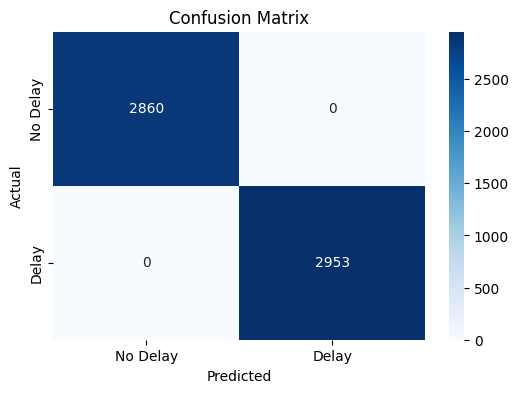

In [ ]:
#Apply CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
y_pred_cls = clf.predict(X_test_cls)

# Classification report
print("\n--- Delay Prediction Classification Report ---")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
print("\n--- Confusion Matrix ---")
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

|                     | Predicted No Delay | Predicted Delay |
| ------------------- | ------------------ | --------------- |
| **Actual No Delay** | 2860               | 0               |
| **Actual Delay**    | 0                  | 2953            |

True Negatives (TN): 2860 — correctly predicted as No Delay.

True Positives (TP): 2953 — correctly predicted as Delay.

False Negatives (FN): 0 — no missed delays.

False Positives (FP): 0 — no flights wrongly predicted as delayed.

Conclusion:RandomForest classifier has perfect performance on the test set (100% accuracy).



# **Benefits of the Model**
Accurate Prediction: Helps airports forecast daily traffic.

Operational Planning: Improves staffing, fuel planning, and maintenance.

Congestion Control: Helps manage runway usage and gate availability.

Delay Reduction: Aids in avoiding flight delays by better preparation.

## **Future Scope**
Integrate real-time flight radar & weather data.

Apply deep learning models (LSTM) for time-series forecasting.

Use interactive dashboards for airport authorities.

Expand to include international airspace congestion prediction.

